# Ensembles: From Decision Trees to Extra Trees

To start, we'll build a decision tree classifier, before taking a look at how we can further improve this algorithm by combining multiple decision trees. As we're feeling woodsy, import and inspect the dataset stored in `mushrooms.csv`.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jirvingphd/dsc-lp-TUNING-random-forests-and-grid-search/master/mushrooms.csv')#'mushrooms.csv')
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Examine the dataset for any null values.

## Defining the Problem & Fitting a Decision Tree

Now, import the necessary packages and fit a decision tree to predict whether or not a mushroom is poisonous (this is stored under the 'class' feature as 'e' for edible, or 'p' for poisonous.

In [7]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## You can also visualize your Decision Trees

> Note: This requires installing graphviz which can be a painful installation.

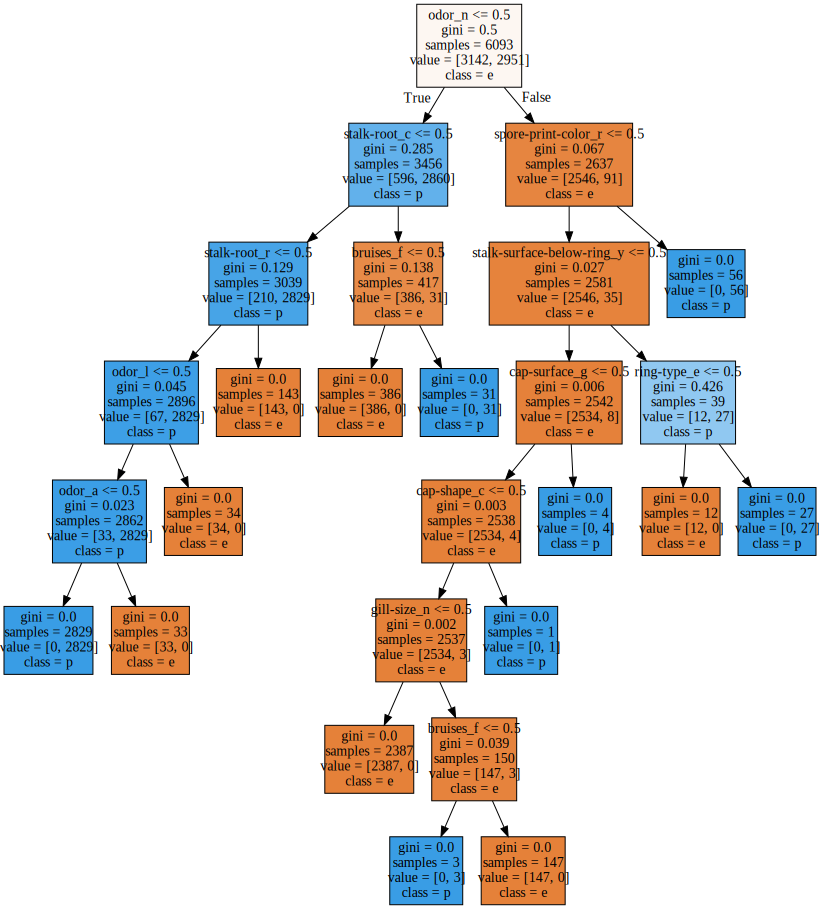

In [9]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
graph = Source(tree.export_graphviz(dt, out_file=None, filled = True, feature_names=X.columns, class_names=['e','p']))
display(SVG(graph.pipe(format='svg')))

A single decision tree will often overfit your training data. There are steps one can take to help with this, like limiting the "depth" of the nodes. But it's often better to do something else: Plant another tree!

Of course, if a second tree is going to be of any value, it has to be *different from* the first. Here's a good algorithm for achieving that:

## Fitting a Set of Bagged Decision Trees

### Bagging Algorithm

Take a sample of your X_train and fit a decision tree to it. <br/>
Replace the first batch of data and repeat. <br/>
When you've got as many trees as you like, make use of all your individual trees' predictions to come up with some holistic prediction. (Most obviously, we could take the average of our predictions, but there are other methods we might try.)

<br/>

Because we're resampling our data with replacement, we're *bootstrapping*. <br/>
Because we're making use of our many samples' predictions, we're *aggregating*. <br/>
Because we're bootstrapping and aggregating all in the same algorithm, we're *bagging*.

In [10]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [11]:
bag.score(X_test, y_test)

1.0

That's a significant improvement in accuracy! Let's see if we can do even better.

## Fitting a Random Forest

### Random Forest Algorithm

Let's add an extra layer of randomization: Instead of using *all* the features of my model to optimize a branch at each node, I'll just choose a subset of my features.

In [12]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
rf.score(X_test, y_test)

1.0

## Fitting a Stand of Extremely Randomized Trees

### Extra Trees Algorithm

Sometimes we might want even one more bit of randomization. Instead of always choosing the *optimal* branching path, we might just choose a branching path at random. If we're doing that, then we've got extremely randomized trees.

In [15]:
et = ExtraTreesClassifier(n_estimators=100)
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [16]:
et.score(X_test, y_test)

1.0

## Gridsearching

In [17]:
param_grid = {
    'n_estimators': [30, 100, 300],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

In [18]:
gs = GridSearchCV(et, param_grid, cv=5)

In [19]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 100, 300], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
gs.score(X_test, y_test)

1.0

In [21]:
gs.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30}